<a href="https://colab.research.google.com/github/sir-iko/sir-iko/blob/main/Nvidia%20stock%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
pip install yfinance

In [3]:
nvda = yf.Ticker("NVDA")
print(nvda)

yfinance.Ticker object <NVDA>


In [4]:
nvda.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [5]:
nvda.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-20 00:00:00-05:00,129.809998,135.279999,128.220001,134.699997,306528600,0.0,0.0
2024-12-23 00:00:00-05:00,136.279999,139.789993,135.119995,139.669998,176053500,0.0,0.0
2024-12-24 00:00:00-05:00,140.000000,141.899994,138.649994,140.220001,105157000,0.0,0.0


In [6]:
nvda.actions

,Dividends,Stock Splits
Date,,
2000-06-27 00:00:00-04:00,0.000000,2.0
2001-09-10 00:00:00-04:00,0.000000,2.0
2006-04-07 00:00:00-04:00,0.000000,2.0
2007-09-11 00:00:00-04:00,0.000000,1.5
2012-11-20 00:00:00-05:00,0.001875,0.0
2013-02-26 00:00:00-05:00,0.001875,0.0
2013-05-21 00:00:00-04:00,0.001875,0.0
2013-08-20 00:00:00-04:00,0.001875,0.0
2013-11-19 00:00:00-05:00,0.002125,0.0


In [7]:
nvda.dividends

,Dividends
Date,
2012-11-20 00:00:00-05:00,0.001875
2013-02-26 00:00:00-05:00,0.001875
2013-05-21 00:00:00-04:00,0.001875
2013-08-20 00:00:00-04:00,0.001875
2013-11-19 00:00:00-05:00,0.002125
2014-02-25 00:00:00-05:00,0.002125
2014-05-20 00:00:00-04:00,0.002125
2014-08-19 00:00:00-04:00,0.002125
2014-11-19 00:00:00-05:00,0.002125


In [8]:
nvda.splits

,Stock Splits
Date,
2000-06-27 00:00:00-04:00,2.0
2001-09-10 00:00:00-04:00,2.0
2006-04-07 00:00:00-04:00,2.0
2007-09-11 00:00:00-04:00,1.5
2021-07-20 00:00:00-04:00,4.0
2024-06-10 00:00:00-04:00,10.0


In [9]:
nvda_data = nvda.history(period="max")
nvda_data['SMA_50'] = nvda_data['Close'].rolling(window=50).mean()
nvda_data['SMA_200'] = nvda_data['Close'].rolling(window=200).mean()

In [10]:
nvda_data['Target'] = nvda_data['Close'].shift(-1)

In [11]:
nvda_data.dropna(inplace=True)

In [12]:
X = nvda_data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200']]
y = nvda_data['Target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.2069108098364578
Root Mean Squared Error (RMSE): 0.7753532726600149


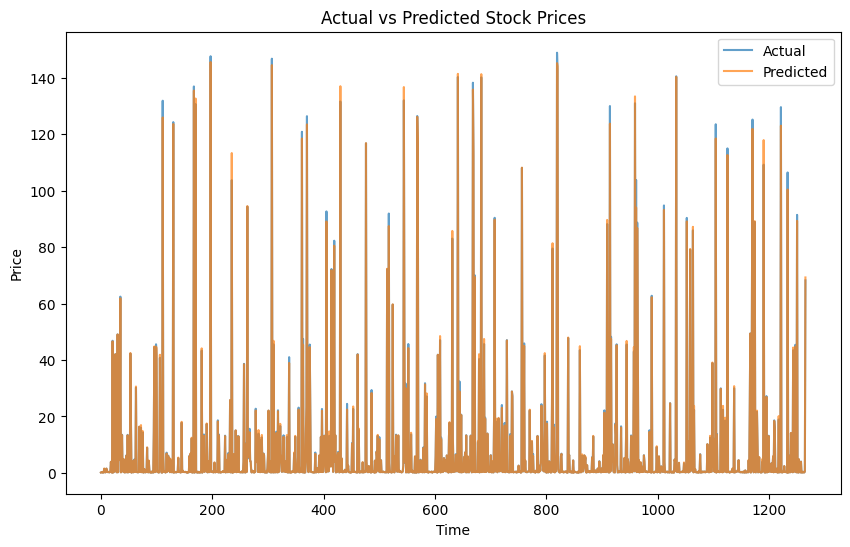

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 0.13906912  0.13832667]
 [ 0.25929811  0.26503769]
 [ 0.28650859  0.28161749]
 ...
 [ 0.16348695  0.16851443]
 [ 0.47719166  0.46082249]
 [69.24730835 68.20366669]]
